In [1]:
import os
import numpy as np
import seaborn as sns # for plots
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats as ss # to calcualte confidence intervals, etc
from adjustText import adjust_text # to adjust the text labels in the plots (pip install adjustText)
from scipy.stats import ttest_rel 
from statsmodels.stats.anova import AnovaRM # perform F test

import cortico_cereb_connectivity.globals as gl
import Functional_Fusion.atlas_map as am
import Functional_Fusion.dataset as ds
import selective_recruitment.data as sd
import selective_recruitment.regress as sr
import selective_recruitment.plotting as sp

wkdir = gl.conn_dir + '/selective_recruitment'


## Global comparison of MDTB conditions in cortex and cerebellum

In [2]:
Y,X,info=sd.get_voxdata_cereb_cortex(dataset='MDTB',ses_id='all')

In [3]:
# Aggregate into the standard data frame for selective recruitment
n_subj = X.shape[0  ]
vec = np.ones((len(info),))
summary_list = []
labels, info['cond_num_uni'] = np.unique(info.cond_name,return_inverse=True)
for i in range(n_subj):
    info_sub = pd.DataFrame({"sn": i * vec,
            "roi": 1 * vec,
            "X":  np.nanmean(X[i,:,:],axis=1),
            "Y":  np.nanmean(Y[i,:,:],axis=1),
            "cond_name": info["cond_name"],
            "cond_num_uni": info["cond_num_uni"],
            "sess": info["sess"]})
    summary_list.append(info_sub)
T= pd.concat(summary_list,ignore_index=True)


In [4]:
T = sr.roi_regress(T,fit_intercept = True)

/Users/jdiedrichsen/Python/selective_recruitment/plotting.py:114: UserWarning: 
The markers list has fewer values (1) than needed (47) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=df, x='X', y='Y', style = split, hue = split, s = 100,legend=None,markers=markers,palette=colors)


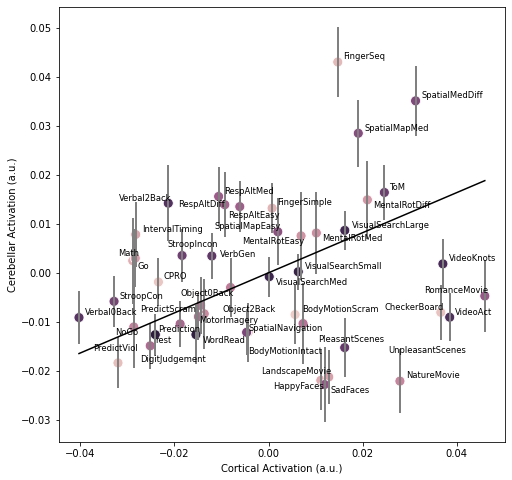

In [9]:
plt.figure(figsize=(8,8))
sp.make_scatterplot(T, split='cond_num_uni',labels = 'cond_name')
plt.savefig('MDTB_all.pdf',dpi=300,bbox_inches='tight')

## Connectivity based comparision

In [4]:
D = sd.get_summary_conn(dataset = "MDTB",
            ses_id = 'all',
            type = "CondHalf",
            cerebellum_roi = None,
            cortex_roi = "Icosahedron1002",
            add_rest = False,
            mname_base = 'MDTB_all_Icosahedron1002_L2regression',
            mname_ext = '_a8',
            crossed = True)
labels, D['cond_num_uni'] = np.unique(D.cond_name,return_inverse=True)
D = sr.roi_regress(D,fit_intercept = True)
D.to_csv(wkdir + '/MDTB_avrg_cMDTB.tsv',sep='\t')


/Users/jdiedrichsen/Python/Functional_Fusion/dataset.py:173: RuntimeWarning: Mean of empty slice
  parcel_data[..., i] = fcn(


In [18]:
D = sd.get_summary_conn(dataset = "MDTB",
            ses_id = 'all',
            type = "CondHalf",
            cerebellum_roi = 'NettekovenSym32',
            cerebellum_roi_selected = ['M','A','D','S'],
            cortex_roi = "Icosahedron1002",
            add_rest = False,
            mname_base = 'MDTB_all_Icosahedron1002_L2regression',
            mname_ext = '_a8',
            crossed = True)
labels, D['cond_num_uni'] = np.unique(D.cond_name,return_inverse=True)
D = sr.roi_regress(D,fit_intercept = True)
D.to_csv(wkdir + '/MDTB_separate_cMDTB.tsv',sep='\t')

/Users/jdiedrichsen/Python/Functional_Fusion/dataset.py:173: RuntimeWarning: Mean of empty slice
  parcel_data[..., i] = fcn(


In [19]:
D = sd.get_summary_conn(dataset = "MDTB",
            ses_id = 'all',
            type = "CondHalf",
            cerebellum_roi = None,
            cortex_roi = "Icosahedron1002",
            add_rest = False,
            mname_base = 'Fusion_all_Icosahedron1002_L2regression',
            mname_ext = '_05',
            crossed = True)
labels, D['cond_num_uni'] = np.unique(D.cond_name,return_inverse=True)
D = sr.roi_regress(D,fit_intercept = True)
D.to_csv(wkdir + '/MDTB_avrg_cFusion5.tsv',sep='\t')

In [20]:
D = sd.get_summary_conn(dataset = "MDTB",
            ses_id = 'all',
            type = "CondHalf",
            cerebellum_roi = 'NettekovenSym32',
            cerebellum_roi_selected = ['M','A','D','S'],
            cortex_roi = "Icosahedron1002",
            add_rest = False,
            mname_base = 'Fusion_all_Icosahedron1002_L2regression',
            mname_ext = '_05',
            crossed = True)
labels, D['cond_num_uni'] = np.unique(D.cond_name,return_inverse=True)
D = sr.roi_regress(D,fit_intercept = True)
D.to_csv(wkdir + '/MDTB_separate_cFusion5.tsv',sep='\t')

/Users/jdiedrichsen/Python/selective_recruitment/plotting.py:114: UserWarning: 
The markers list has fewer values (1) than needed (47) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=df, x='X', y='Y', style = split, hue = split, s = 100,legend=None,markers=markers,palette=colors)


<Axes: xlabel='Cortical Activation (a.u.)', ylabel='Cerebellar Activation (a.u.)'>

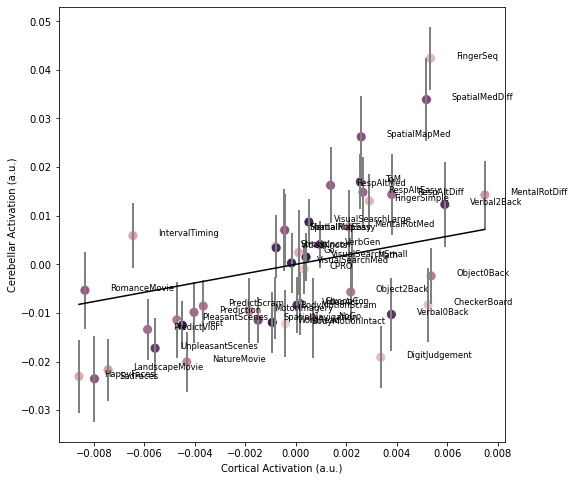

In [2]:
D= pd.read_csv(wkdir + '/MDTB_avrg_cMDTB.tsv',sep='\t')
plt.figure(figsize=(8,8))
sp.make_scatterplot(D, split='cond_num_uni',labels = 'cond_name')
plt.savefig(wkdir + '/sr_MDTB_average.pdf',bbox_inches='tight')

/Users/jdiedrichsen/Python/selective_recruitment/plotting.py:114: UserWarning: 
The markers list has fewer values (1) than needed (47) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=df, x='X', y='Y', style = split, hue = split, s = 100,legend=None,markers=markers,palette=colors)


<Axes: xlabel='Cortical Activation (a.u.)', ylabel='Cerebellar Activation (a.u.)'>

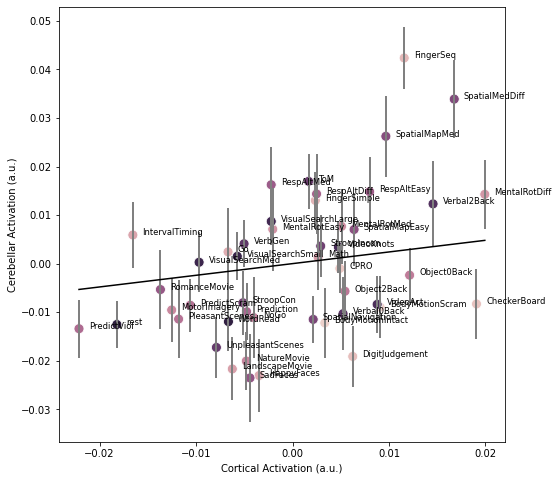

In [3]:
D= pd.read_csv(wkdir + '/MDTB_avrg_cFusion5.tsv',sep='\t')
plt.figure(figsize=(8,8))
sp.make_scatterplot(D, split='cond_num_uni',labels = 'cond_name')

/Users/jdiedrichsen/Python/selective_recruitment/plotting.py:114: UserWarning: 
The markers list has fewer values (1) than needed (47) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=df, x='X', y='Y', style = split, hue = split, s = 100,legend=None,markers=markers,palette=colors)


<Axes: xlabel='Cortical Activation (a.u.)', ylabel='Cerebellar Activation (a.u.)'>

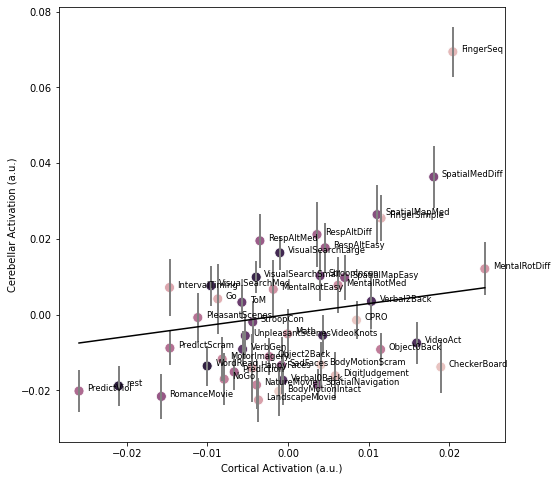

In [4]:
D= pd.read_csv(wkdir + '/MDTB_separate_cFusion5.tsv',sep='\t')
plt.figure(figsize=(8,8))
sp.make_scatterplot(D[D.roi_name=='M'], split='cond_num_uni',labels = 'cond_name')

/Users/jdiedrichsen/Python/selective_recruitment/plotting.py:114: UserWarning: 
The markers list has fewer values (1) than needed (47) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=df, x='X', y='Y', style = split, hue = split, s = 100,legend=None,markers=markers,palette=colors)


<Axes: xlabel='Cortical Activation (a.u.)', ylabel='Cerebellar Activation (a.u.)'>

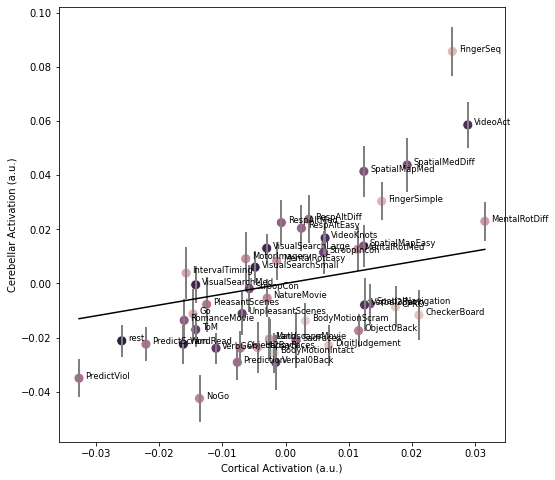

In [5]:
D= pd.read_csv(wkdir + '/MDTB_separate_cFusion5.tsv',sep='\t')
plt.figure(figsize=(8,8))
sp.make_scatterplot(D[D.roi_name=='A'], split='cond_num_uni',labels = 'cond_name')

/Users/jdiedrichsen/Python/selective_recruitment/plotting.py:114: UserWarning: 
The markers list has fewer values (1) than needed (47) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=df, x='X', y='Y', style = split, hue = split, s = 100,legend=None,markers=markers,palette=colors)


<Axes: xlabel='Cortical Activation (a.u.)', ylabel='Cerebellar Activation (a.u.)'>

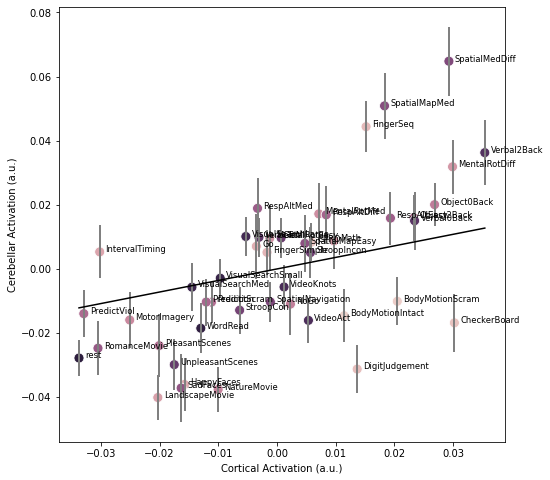

In [6]:
D= pd.read_csv(wkdir + '/MDTB_separate_cFusion5.tsv',sep='\t')
plt.figure(figsize=(8,8))
sp.make_scatterplot(D[D.roi_name=='D'], split='cond_num_uni',labels = 'cond_name')

/Users/jdiedrichsen/Python/selective_recruitment/plotting.py:114: UserWarning: 
The markers list has fewer values (1) than needed (47) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(data=df, x='X', y='Y', style = split, hue = split, s = 100,legend=None,markers=markers,palette=colors)


<Axes: xlabel='Cortical Activation (a.u.)', ylabel='Cerebellar Activation (a.u.)'>

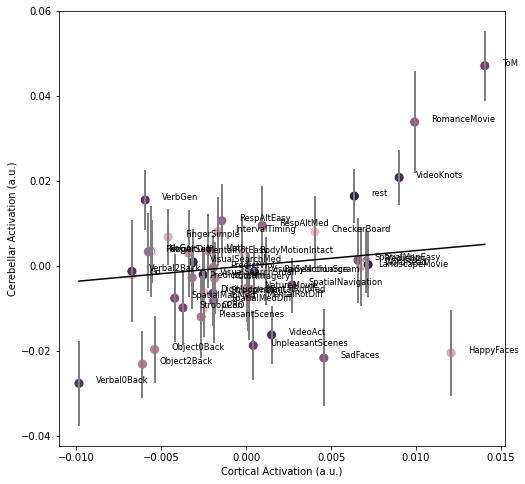

In [7]:
D= pd.read_csv(wkdir + '/MDTB_separate_cFusion5.tsv',sep='\t')
plt.figure(figsize=(8,8))
sp.make_scatterplot(D[D.roi_name=='S'], split='cond_num_uni',labels = 'cond_name')